In [1]:
import pandas as pd
import numpy as np
import string
from scipy.stats import pearsonr
import re
from string import punctuation


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV

from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import re
from string import punctuation


from collections import Counter
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
sample_fear = pd.read_excel(r"C:\Users\kushal\Desktop\bennet dataset\Task 2 data\EI-oc-En-train\EI-oc-En-fear-train.xlsx")

In [6]:
sample_fear.head()

,ID,Tweet,Affect Dimension,Intensity Class
0,2017-En-20968,@RockSolidShow @Pat_Francis #revolting cocks i...,fear,0: no fear can be inferred
1,2017-En-21816,@Its_just_Huong I will beat you !!! Always tho...,fear,1: low amount of fear can be inferred
2,2017-En-21532,â€œWhat worries you masters you.â€ - Haddon R...,fear,1: low amount of fear can be inferred
3,2017-En-20740,@carlybigelow13 first you take the room now yo...,fear,0: no fear can be inferred
4,2017-En-20022,@RogueCoder250 We are in so much trouble!! I d...,fear,3: high amount of fear can be inferred


In [7]:
sample_fear['Intensity_class'] = sample_fear['Intensity Class'].apply(lambda x : x.split(':')[0])
sample_fear['Intensity_class_name'] = sample_fear['Intensity Class'].apply(lambda x : x.split(':')[1])
sample_fear.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name
0,2017-En-20968,@RockSolidShow @Pat_Francis #revolting cocks i...,fear,0: no fear can be inferred,0,no fear can be inferred
1,2017-En-21816,@Its_just_Huong I will beat you !!! Always tho...,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred
2,2017-En-21532,â€œWhat worries you masters you.â€ - Haddon R...,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred
3,2017-En-20740,@carlybigelow13 first you take the room now yo...,fear,0: no fear can be inferred,0,no fear can be inferred
4,2017-En-20022,@RogueCoder250 We are in so much trouble!! I d...,fear,3: high amount of fear can be inferred,3,high amount of fear can be inferred


In [9]:
sample_fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 6 columns):
ID                      2252 non-null object
Tweet                   2252 non-null object
Affect Dimension        2252 non-null object
Intensity Class         2252 non-null object
Intensity_class         2252 non-null object
Intensity_class_name    2252 non-null object
dtypes: object(6)
memory usage: 105.6+ KB


In [11]:
# get unique Intensity Class  counts
sample_fear.groupby('Intensity_class_name').describe()

Affect Dimension                     \
                                                    count unique   top  freq   
Intensity_class_name                                                           
 high amount of fear can be inferred                  193      1  fear   193   
 low amount of fear can be inferred                   320      1  fear   320   
 moderate amount of fear can be inferred              249      1  fear   249   
 no fear can be inferred                             1490      1  fear  1490   

                                            ID                             \
                                         count unique            top freq   
Intensity_class_name                                                        
 high amount of fear can be inferred       193    193  2017-En-20050    1   
 low amount of fear can be inferred        320    320  2017-En-20277    1   
 moderate amount of fear can be inferred   249    249  2017-En-21292    1   
 no fear can be inferred                  1490   1490  2017-En-21922    1   

                                         Intensity Class         \
                                                   count unique   
Intensity_class_name                                              
 high amount of fear can be inferred                 193      1   
 low amount of fear can be inferred                  320      1   
 moderate amount of fear can be inferred             249      1   
 no fear can be inferred                            1490      1   

                                                                                      \
                                                                                 top   
Intensity_class_name                                                                   
 high amount of fear can be inferred          3: high amount of fear can be inferred   
 low amount of fear can be inferred            1: low amount of fear can be inferred   
 moderate amount of fear can be inferred  2: moderate amount of fear can be inferred   
 no fear can be inferred                                  0: no fear can be inferred   

                                               Intensity_class             \
                                          freq           count unique top   
Intensity_class_name                                                        
 high amount of fear can be inferred       193             193      1   3   
 low amount of fear can be inferred        320             320      1   1   
 moderate amount of fear can be inferred   249             249      1   2   
 no fear can be inferred                  1490            1490      1   0   

                                               Tweet         \
                                          freq count unique   
Intensity_class_name                                          
 high amount of fear can be inferred       193   193    193   
 low amount of fear can be inferred        320   320    320   
 moderate amount of fear can be inferred   249   249    249   
 no fear can be inferred                  1490  1490   1490   

                                                                                             \
                                                                                        top   
Intensity_class_name                                                                          
 high amount of fear can be inferred      mm nothing like a good old fashioned panic ind...   
 low amount of fear can be inferred       The fact that we have a presidential candidate...   
 moderate amount of fear can be inferred  Watching It Follows.  This is a super freaky m...   
 no fear can be inferred                  today has been terrible but tonight will end b...   

                                               
                                         freq  
Intensity_class_name                           
 high amount of fear can be inferred        1  
 low amount o

In [12]:
sample_fear['length'] = sample_fear['Tweet'].apply(len)
sample_fear.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length
0,2017-En-20968,@RockSolidShow @Pat_Francis #revolting cocks i...,fear,0: no fear can be inferred,0,no fear can be inferred,67
1,2017-En-21816,@Its_just_Huong I will beat you !!! Always tho...,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred,133
2,2017-En-21532,â€œWhat worries you masters you.â€ - Haddon R...,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred,113
3,2017-En-20740,@carlybigelow13 first you take the room now yo...,fear,0: no fear can be inferred,0,no fear can be inferred,65
4,2017-En-20022,@RogueCoder250 We are in so much trouble!! I d...,fear,3: high amount of fear can be inferred,3,high amount of fear can be inferred,113


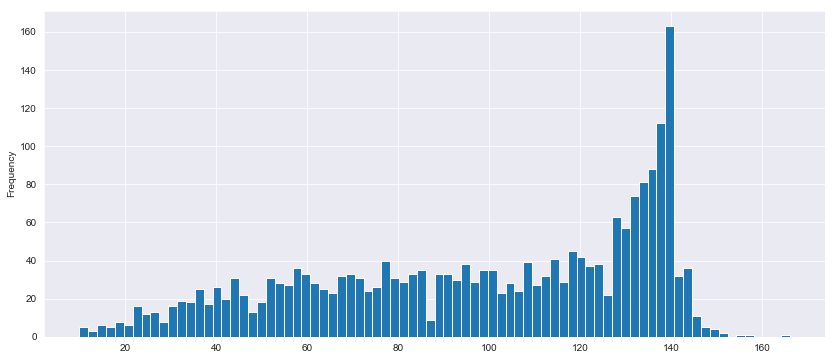

In [13]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,6))
sample_fear['length'].plot(bins=80, kind='hist') 

In [14]:
# get most common words in training dataset
all_words = []
for line in list(sample_fear['Tweet']):
    words = line.split()
    
for word in words:
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(10)

[('your', 2),
 ('@thesummerishere', 1),
 ('ass', 1),
 ('looks', 1),
 ('horrible!', 1),
 ('oh,', 1),
 ('is', 1),
 ('that', 1),
 ('face?', 1)]

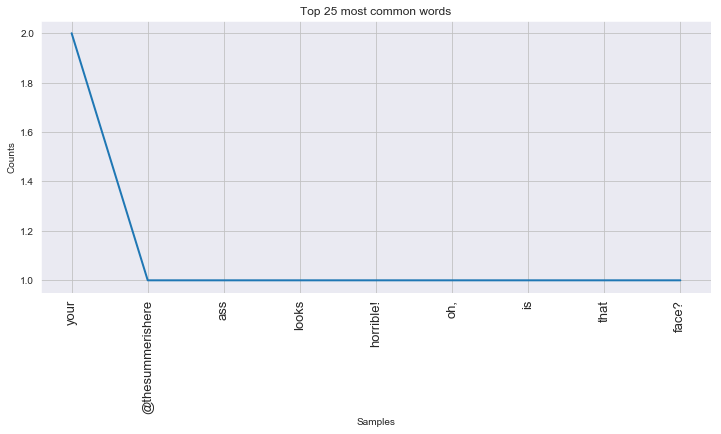

Text(0.5, 1.0, 'log-log plot of words frequency')

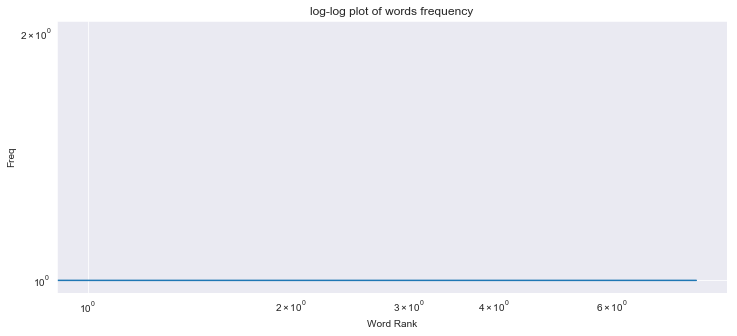

In [15]:
# plot word frequency distribution of first few words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25)
# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')

In [16]:
# helper function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove chines words
    tweet = re.sub(r'˜¥\w*','', tweet)
    tweet = re.sub(r'˜€\w*','', tweet)
    tweet = re.sub(r'˜¤\w*','', tweet)
    tweet = re.sub(r'˜ªðÿ\w*','', tweet)
    tweet = re.sub(r'ðÿ™\w*','', tweet)
    tweet = re.sub(r'\\\w*','', tweet)
    tweet = re.sub(r'±\w*','', tweet)
    tweet = re.sub(r'\w*','', tweet)
    tweet = re.sub(r'™„˜­\w*','', tweet)
    tweet = re.sub(r'ðÿ§€\w*','', tweet)
    tweet = re.sub(r'‘šðÿ¼\w*','', tweet)
    tweet = re.sub(r'ðÿ•\w*','', tweet)
    tweet = re.sub(r'€¢\w*','', tweet)
    tweet = re.sub(r'ã©\w*','', tweet)
    
    tweet = re.sub(r'\w*','',tweet)
    
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet
# ______________________________________________________________

# clean dataframe's text column
sample_fear['Tweet'] = sample_fear['Tweet'].apply(processTweet)
# preview some cleaned tweets
sample_fear['Tweet'].head(1000)

0                                  cocks you think sexy 
1      will beat you always thought gryffindor this w...
2      €œwhat worries you masters you € haddon robinson 
3            first you take the room now you wanna beat 
4      are much trouble don think the rev will see th...
5      make him bully sit him room himself and let hi...
6      3years today marks the anniversary that horrid...
7                      are you guys still down when can 
8      like the big bully class ruining everyone lunc...
9                              what your favorite movie 
10     not sure thats accomplishment something worry ...
11                                     hate being shy ˜©
12                                                 yeah 
13     agree rioters destroy property injure citizens...
14     bad slash prices send them refugee camps like ...
15                                          shaking now 
16     and they cover these police shootings fairly w...
17     € less sugar more fruit 

In [18]:
# drop duplicates
sample_fear= sample_fear.drop_duplicates('Tweet')
sample_fear.shape

(1763, 7)

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [20]:
# show stop words examples
stop_words = stopwords.words('english') # Show some stop words
' , '.join(stop_words)[:200], len(stop_words)

("i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it ",
 179)

In [21]:
sample_fear["Tweet"].head(10)

0                                cocks you think sexy 
1    will beat you always thought gryffindor this w...
2    €œwhat worries you masters you € haddon robinson 
3          first you take the room now you wanna beat 
4    are much trouble don think the rev will see th...
5    make him bully sit him room himself and let hi...
6    3years today marks the anniversary that horrid...
7                    are you guys still down when can 
8    like the big bully class ruining everyone lunc...
9                            what your favorite movie 
Name: Tweet, dtype: object

In [22]:
# tokenize helper function
def text_process(raw_text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords.words('english')]




# -------------------------------------------

# tokenize message column and create a column for tokens
sample_fear = sample_fear.copy()
sample_fear['tokens'] = sample_fear['Tweet'].apply(text_process) # tokenize style


sample_fear.head()

,ID,Tweet,Affect Dimension,Intensity Class,Intensity_class,Intensity_class_name,length,tokens
0,2017-En-20968,cocks you think sexy,fear,0: no fear can be inferred,0,no fear can be inferred,67,"[cocks, think, sexy]"
1,2017-En-21816,will beat you always thought gryffindor this w...,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred,133,"[beat, always, thought, gryffindor, whole, new..."
2,2017-En-21532,€œwhat worries you masters you € haddon robinson,fear,1: low amount of fear can be inferred,1,low amount of fear can be inferred,113,"[€œwhat, worries, masters, €, haddon, robinson]"
3,2017-En-20740,first you take the room now you wanna beat,fear,0: no fear can be inferred,0,no fear can be inferred,65,"[first, take, room, wanna, beat]"
4,2017-En-20022,are much trouble don think the rev will see th...,fear,3: high amount of fear can be inferred,3,high amount of fear can be inferred,113,"[much, trouble, think, rev, see, funny, side, ..."


In [23]:
from wordcloud import WordCloud

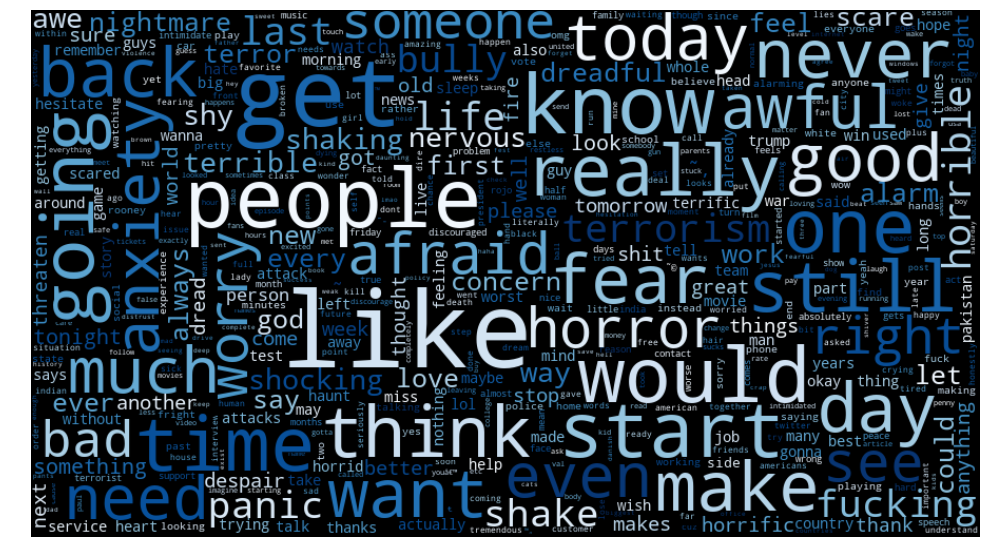

In [24]:
# split sentences to get individual words
all_words = []
for line in sample_fear['tokens']: # try 'tokens'
    all_words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(all_words)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(wordfreq)

plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# vectorize
bow_transformer = CountVectorizer(analyzer=text_process).fit(sample_fear['Tweet'])
# print total number of vocab words
print(len(bow_transformer.vocabulary_))
# output
6865
# example of vectorized text
sample_tweet = sample_fear['Tweet'][111]
print(sample_tweet)
print('\n')
# vector representation
bow_sample = bow_transformer.transform([sample_tweet])
print(bow_sample)
print('\n')



4739
americans for hrc now maybe you see the world getting rid terror save their countries you get the dems out 


  (0, 199)	1
  (0, 925)	1
  (0, 1105)	1
  (0, 1728)	1
  (0, 1730)	1
  (0, 1996)	1
  (0, 2524)	1
  (0, 3404)	1
  (0, 3511)	1
  (0, 3557)	1
  (0, 4064)	1
  (0, 4516)	1




In [26]:
# transform the entire DataFrame of messages
messages_bow = bow_transformer.transform(sample_fear['Tweet'])
# check out the bag-of-words counts for the entire corpus as a large sparse matrix
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)


Shape of Sparse Matrix:  (1763, 4739)
Amount of Non-Zero occurences:  12573


In [27]:
# from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf_sample = tfidf_transformer.transform(bow_sample)
print(tfidf_sample)


  (0, 4516)	0.25421819132818546
  (0, 4064)	0.23540724245435013
  (0, 3557)	0.2269487057890097
  (0, 3511)	0.31007471366455774
  (0, 3404)	0.3610431920392495
  (0, 2524)	0.26175801463894377
  (0, 1996)	0.3288856625383931
  (0, 1730)	0.2675647719552065
  (0, 1728)	0.18819520295744435
  (0, 1105)	0.3610431920392495
  (0, 925)	0.31007471366455774
  (0, 199)	0.30292312281466405


In [28]:
# to transform the entire bag-of-words corpus
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)



(1763, 4739)


In [30]:
# Run Train Data Through Pipeline analyzer=text_process
# uncomment below to train on a larger dataset but it is very slow for a regular laptop

# X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(sample_fear['Tweet'], sample_fear['Intensity_class'], test_size=0.3, random_state = 42)


# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(strip_accents='ascii',
                            stop_words='english',
                            lowercase=True)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# this is where we define the values for GridSearchCV to iterate over
parameters = {'bow__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'classifier__alpha': (1e-2, 1e-3),
             }

# do 10-fold cross validation for each of the 6 possible combinations of the above params
grid = GridSearchCV(pipeline, cv=10, param_grid=parameters, verbose=1)
grid.fit(X_train,y_train)

# summarize results
print("\nBest Model: %f using %s" % (grid.best_score_, grid.best_params_))
print('\n')
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean: %f Stdev:(%f) with: %r" % (mean, stdev, param))


Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



Best Model: 0.644246 using {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}


Mean: 0.622366 Stdev:(0.030660) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.635332 Stdev:(0.025936) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.622366 Stdev:(0.017231) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.630470 Stdev:(0.025100) with: {'bow__ngram_range': (1, 1), 'classifier__alpha': 0.001, 'tfidf__use_idf': False}
Mean: 0.630470 Stdev:(0.035453) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': True}
Mean: 0.644246 Stdev:(0.027384) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.01, 'tfidf__use_idf': False}
Mean: 0.623177 Stdev:(0.026025) with: {'bow__ngram_range': (1, 2), 'classifier__alpha': 0.001, 'tfidf__use_idf': True}
Mean: 0.635332 Stdev:(0.030792) with: {'bow__ngram_range'

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.1s finished


In [31]:
from sklearn.externals import joblib

In [32]:
# save best model to current working directory
joblib.dump(grid, "twitter_sentiment.pkl")

['twitter_sentiment.pkl']

In [33]:
# load from file and predict using the best configs found in the CV step
model_NB = joblib.load("twitter_sentiment.pkl" )

# get predictions from best model above
y_preds = model_NB.predict(X_test)

print('accuracy score: ',accuracy_score(y_test, y_preds))
print('\n')
print('confusion matrix: \n',confusion_matrix(y_test,y_preds))
print('\n')
print(classification_report(y_test, y_preds))

accuracy score:  0.6219281663516069


confusion matrix: 
 [[306  21   8   4]
 [ 67  12   3   2]
 [ 44   7   4   1]
 [ 40   0   3   7]]


              precision    recall  f1-score   support

           0       0.67      0.90      0.77       339
           1       0.30      0.14      0.19        84
           2       0.22      0.07      0.11        56
           3       0.50      0.14      0.22        50

   micro avg       0.62      0.62      0.62       529
   macro avg       0.42      0.31      0.32       529
weighted avg       0.55      0.62      0.56       529

